### Interpretability Cases:

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

<img src='Image/structure.PNG'>

### Preq

In [2]:
# imports
import h2o 
import numpy as np
import pandas as pd
import seaborn as sns

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# start h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,11 hours 58 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 20 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_is8mro
H2O cluster total nodes:,1
H2O cluster free memory:,1.583 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### Read the Training & Production data.

In [4]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Session 1: Temporary testing for comparison training & production.

#### Temp 0: convert to pd frame for temp testing.

In [6]:
pd_frame_training = frame_training.as_data_frame().drop(columns=['Training =1, Validation = 2'])
pd_frame_production = frame_production.as_data_frame().drop(columns=['Training =1, Validation = 2'])

#### Temp 1: Columns number:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production.

In [7]:
print('Training column number: ', len(pd_frame_training.columns))
print('Production column number: ',len(pd_frame_production.columns))
print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

Training column number:  150
Production column number:  149
Column difference:  {'Gestational Category at Delivery'}


#### Temp 2: check null values:   
#### <font color='red'>Training:  </font>
  <font color='red'>__'Cervical Sludge', 'Candida/Fungal Species'__ are the top 2 features with most null values.</font>

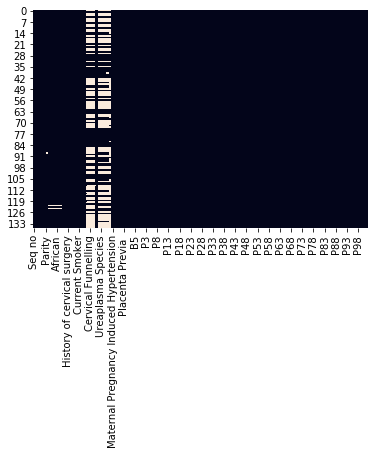

In [8]:
sns.heatmap(pd_frame_training.isnull(), cbar=False)

#### <font color='red'>Production:  </font>
 <font color='red'>__'Cervical Funnelling', 'Ureaplasma Species'__ are the top 2 features with most null values.</font>

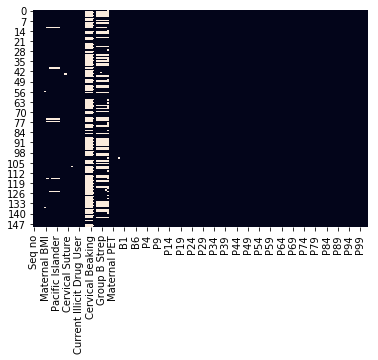

In [9]:
sns.heatmap(pd_frame_production.isnull(), cbar=False)

### Temporary exploration:

#### Training:

In [10]:
desc_training=pd_frame_training.drop(columns='Seq no').describe()
pd_frame_training.drop(columns='Seq no').describe()

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,...,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,...,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685055,1.430292,1.410915
min,16.000000,19.400000,1.000000,0.000000,16.400000,3.125000,60.295946,0.003608,0.371777,6.519167,...,0.000136,0.000450,0.000005,0.000029,0.018401,0.000625,0.006927,0.001320,0.022867,0.000263
25%,17.710000,30.762500,1.000000,0.000000,21.000000,106.003250,198.467776,0.195664,1.793863,44.355049,...,0.009952,0.021774,0.004726,0.016173,0.161343,0.043803,0.097970,0.073376,0.296664,0.077842
50%,19.710000,33.375000,2.000000,1.000000,23.200000,323.507500,582.585700,2.983745,3.091631,74.683159,...,0.202774,0.457325,0.430157,0.352690,0.333220,0.267914,0.285882,0.689011,0.518669,0.493214
75%,21.360000,36.232500,3.000000,1.000000,27.000000,912.146750,1650.877450,8.025457,4.824558,126.215387,...,1.120935,2.040173,2.903092,1.827702,0.788932,1.031289,0.689580,2.332390,1.314885,1.934372
max,24.000000,43.510000,9.000000,3.000000,59.300000,1969.045000,3801.321700,120.710130,277.325219,1778.650800,...,113.211393,529.222079,76.552972,16.926530,40.104567,94.287664,44.547283,64.164284,14.187283,5.231499


#### Production:

In [11]:
desc_production=pd_frame_production.drop(columns='Seq no').describe()
pd_frame_production.drop(columns='Seq no').describe()

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,...,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,...,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.566073,2.149451
min,16.000000,20.990000,1.000000,0.000000,16.200000,12.948000,33.659184,0.017049,0.078125,8.159083,...,0.000101,0.000947,0.000022,0.000099,0.002067,0.000072,0.001293,0.000502,0.001711,0.000058
25%,18.000000,30.175000,1.000000,0.000000,21.400000,143.719000,178.447500,0.675915,1.130384,38.729875,...,0.023556,0.057292,0.010133,0.070202,0.072833,0.014326,0.066029,0.037293,0.211314,0.032547
50%,19.430000,33.085000,2.000000,1.000000,23.750000,369.108441,378.217631,3.328432,2.183271,59.906343,...,0.135274,0.451799,0.390900,0.433052,0.218202,0.140734,0.203529,0.393042,0.598743,0.361657
75%,20.430000,35.947500,3.000000,1.000000,27.725000,1068.638832,1113.213755,8.113037,3.894073,98.462228,...,0.675443,1.532041,2.422641,1.973654,0.552411,0.607905,0.813658,1.480467,1.174113,1.422383
max,23.710000,42.650000,9.000000,7.000000,49.700000,2522.744000,4153.461818,15.398214,231.639327,248.654530,...,75.515202,6.740217,7.200691,9.562848,50.225228,77.922709,65.478317,6.755963,12.299685,9.585188


In [12]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

#### <font color='red'>The following features are quite different between training and production datasets. </font>

In [14]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,...,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,...,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,...,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,...,0.343920,0.525445,0.769196,0.709220,7.904097,7.734763,4.358144,1.631660,12.365847,3.551886
25%,0.016111,0.019470,0.000000,NaN,0.018692,0.262427,0.112191,0.710519,0.586950,0.145241,...,0.577494,0.619950,0.533604,0.769629,1.215246,2.057560,0.483730,0.967569,0.403899,1.391672
50%,0.014411,0.008765,0.000000,0.000000,0.023158,0.123543,0.540345,0.103559,0.416055,0.246665,...,0.498989,0.012232,0.100427,0.185570,0.527119,0.903688,0.404629,0.753022,0.133737,0.363765
75%,0.045521,0.007928,0.000000,0.000000,0.026150,0.146441,0.482983,0.010795,0.238949,0.281866,...,0.659554,0.331670,0.198317,0.073950,0.428160,0.696464,0.152494,0.575442,0.119896,0.359952
max,0.012231,0.020164,0.000000,0.571429,0.193159,0.219483,0.084782,6.839229,0.197229,6.153100,...,0.499187,77.517070,9.631337,0.770030,0.201506,0.210015,0.319664,8.497430,0.153467,0.454210


### <font color='red'> Exploration Conclusions: </font>
- __1 column missed: <font color='red'> Gestational Category</font> at Delivery is missed in production.__
- __Difference in null values between T & P:__  
    - Traning top 2 features: <font color='red'>'Cervical Sludge', 'Candida/Fungal Species'</font>;  
    - Production top 2 features: <font color='red'>'Cervical Funnelling', 'Ureaplasma Species'</font>.  
- __Some features have great difference in description information between T & P:__  
    __e.g.:__  
     'Gestational Age at Collection' difference in 'std' between T & P is <font color='red'>0.302178</font>.  
     'B1' difference in 'min' between T & P is <font color='red'>0.758650</font>.  
     'B2' difference in '50%' between T & P is <font color='red'>0.540345</font>.
        

### Session 2: Explore the important variables.

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

In [27]:
from h2o.automl import H2OAutoML
import time

In [16]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

#### Get independent variables:

In [21]:
target='Gestational Category at Delivery'

X=get_independent_variables(frame_training, target) 
print(X)

['Seq no', 'Training =1, Validation = 2', 'Gravidity', 'Parity', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Current Illicit Drug User', 'Have any previous pregnancies had an antepartum haemorrhage? (? 50ml)', 'Cervical change seen during speculum examination', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Maternal Age at Recruitment / 1st Sample'

#### Get the best models with parameters:

In [22]:
run_time=500

In [25]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [29]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### Retrive the learderboard of the best models:

In [39]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_20190726_002017_model_1,0.852487,0.435574,0.458333,0.293285,0.0860164
DeepLearning_grid_1_AutoML_20190726_002017_model_2,0.837702,0.929872,0.5,0.357946,0.128126
DeepLearning_grid_1_AutoML_20190726_002017_model_4,0.837366,0.573685,0.5,0.33317,0.111002
DeepLearning_grid_1_AutoML_20190726_002017_model_3,0.823589,1.17864,0.379032,0.37633,0.141624
GBM_1_AutoML_20190726_002017,0.816532,0.371732,0.5,0.315195,0.0993482
DeepLearning_grid_1_AutoML_20190726_002017_model_5,0.80914,0.599522,0.5,0.349912,0.122439
GBM_grid_1_AutoML_20190726_002017_model_7,0.799731,0.293286,0.5,0.295316,0.0872113
DeepLearning_grid_1_AutoML_20190726_002017_model_9,0.787298,0.601993,0.5,0.333784,0.111412
DeepLearning_grid_1_AutoML_20190726_002017_model_10,0.77957,0.405768,0.5,0.327287,0.107117
DeepLearning_grid_1_AutoML_20190726_002017_model_8,0.775538,0.857141,0.458333,0.328925,0.108191


#### Get the best algorithm of model:
- The <font color='red'>deeplearning model: __'DeepLearning_grid_1_AutoML_20190726_002017_model_1'__</font> should be the best model to fit training data.

In [31]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model.algo)

The algorithm of best model:  deeplearning


#### Get the parameters of this best deeplearning model:

In [33]:
best_model_param = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model_param.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190726_002017_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190726_002017_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Compiled_list_for_AI_training.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Compiled_list_for_AI_training.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},

#### Get some matrix/evaluation about this best (deeplearning) model.

In [42]:
model_1 = h2o.get_model(leaderboard[0,"model_id"])
model_1

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190726_002017_model_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 4.3600576469889955e-06
RMSE: 0.002088075105686813
LogLoss: 0.0005210638378778895
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.3951612903225806
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9827618712280762: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9827619,1.0,49.0
max f2,0.9827619,1.0,49.0
max f0point5,0.9827619,1.0,49.0
max accuracy,0.9827619,1.0,49.0
max precision,1.0000000,1.0,0.0
max recall,0.9827619,1.0,49.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9827619,1.0,49.0
max min_per_class_accuracy,0.9827619,1.0,49.0
max mean_per_class_accuracy,0.9827619,1.0,49.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.13 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0882353,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.0967742,0.0967742,9.6774194,9.6774194
,2,0.1176471,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0,0.0322581,0.1290323,9.6774194,9.6774194
,3,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0403226,0.1693548,9.6774194,9.6774194
,4,0.2132353,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0645161,0.2338710,9.6774194,9.6774194
,5,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0967742,0.3306452,9.6774194,9.6774194
,6,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,7,0.5,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.5483871,9.6774194,9.6774194
,8,0.6029412,0.9999977,1.0967742,1.0967742,1.0,0.9999995,1.0,0.9999999,0.1129032,0.6612903,9.6774194,9.6774194
,9,0.6985294,0.9999613,1.0967742,1.0967742,1.0,0.9999879,1.0,0.9999983,0.1048387,0.7661290,9.6774194,9.6774194
,10,0.8014706,0.9995790,1.0967742,1.0967742,1.0,0.9998260,1.0,0.9999761,0.1129032,0.8790323,9.6774194,9.6774194




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.08601637197870424
RMSE: 0.2932854786359261
LogLoss: 0.43557425842894726
Mean Per-Class Error: 0.17204301075268813
AUC: 0.852486559139785
pr_auc: 0.5400964744631807
Gini: 0.70497311827957
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0514345008393062: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),1.0,11.0,0.9167,(11.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,1.0,135.0,0.0809,(11.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0514345,0.9575290,75.0
max f2,0.0514345,0.9825674,75.0
max f0point5,0.9246459,0.9461806,53.0
max accuracy,0.0969575,0.9191176,73.0
max precision,1.0000000,1.0,0.0
max recall,0.0514345,1.0,75.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9969274,0.4385879,44.0
max min_per_class_accuracy,0.9969274,0.8225806,44.0
max mean_per_class_accuracy,0.9969274,0.8279570,44.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.89 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0367647,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.0403226,0.0403226,9.6774194,9.6774194
,2,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0,0.0080645,0.0483871,9.6774194,9.6774194
,3,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,4,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,5,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,6,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,7,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,8,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,9,0.5,0.9999980,1.0124069,1.0806452,0.9230769,0.9999993,0.9852941,0.9999999,0.0967742,0.5403226,1.2406948,8.0645161
,10,0.6029412,0.9999793,1.0184332,1.0700236,0.9285714,0.9999929,0.9756098,0.9999987,0.1048387,0.6451613,1.8433180,7.0023603



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9410053,0.0130625,0.9642857,0.962963,0.9259259,0.9259259,0.9259259
auc,0.8756767,0.0453747,0.9615384,0.9230769,0.8804348,0.8333333,0.78
err,0.0589947,0.0130625,0.0357143,0.0370370,0.0740741,0.0740741,0.0740741
err_count,1.6,0.3464102,1.0,1.0,2.0,2.0,2.0
f0point5,0.9505215,0.0113848,0.9701493,0.9701493,0.9349593,0.9375,0.9398496
f1,0.9684272,0.0073701,0.9811321,0.9811321,0.9583333,0.96,0.9615384
f2,0.9870995,0.0030557,0.9923664,0.9923664,0.982906,0.9836066,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.4379456,0.1751041,0.1154459,0.2018883,0.7475551,0.6625194,0.4623192
max_per_class_error,0.7333333,0.1598611,0.5,1.0,0.5,0.6666667,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-07-26 00:21:37,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-07-26 00:21:37,28.426 sec,3505 obs/sec,10.0,1,1360.0,0.2162696,0.2087391,0.4186121,0.9704301,0.6423778,1.0967742,0.0441176
,2019-07-26 00:21:42,33.464 sec,4030 obs/sec,160.0,16,21760.0,0.0020881,0.0005211,0.9999458,1.0,0.3951613,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Maternal BMI,1.0,1.0,0.0078830
Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).Unknown,0.9085999,0.9085999,0.0071625
Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).No,0.8241966,0.8241966,0.0064972
Uterine Malformation.Yes,0.8111946,0.8111946,0.0063947
Gestational Age at Collection,0.7474133,0.7474133,0.0058919
---,---,---,---
Maternal Pregnancy Induced Hypertension.missing(NA),0.0,0.0,0.0
Maternal PET.missing(NA),0.0,0.0,0.0
Maternal GDM.missing(NA),0.0,0.0,0.0
Antepartum Haemorrhage.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


#### Plot the variable importance of training dataset based on the best model (deeplearning).

- The top 5 important variables are:  
<font color='red'>__'Maternal BMI'__</font>  
<font color='red'>__'Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).Unknown'__</font>  
<font color='red'>__'Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).No'__ </font>  
<font color='red'>__'Uterine Malformation.Yes'__</font>  
<font color='red'>__'Gestational Age at Collection'__</font>  

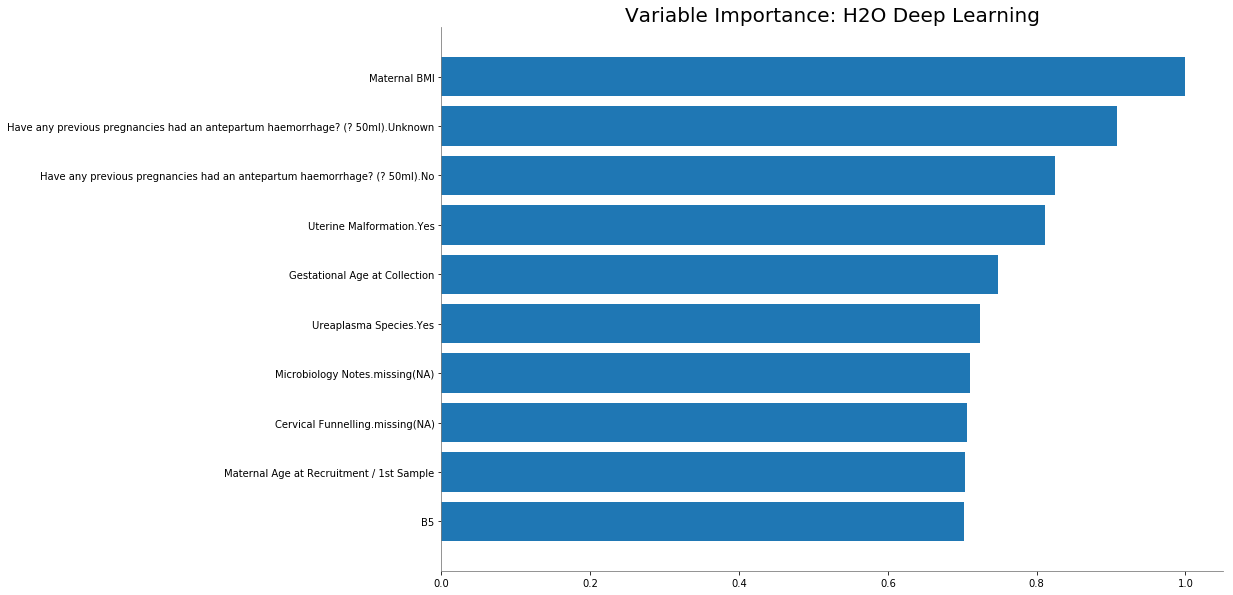

In [44]:
model_1.varimp_plot()

#### **(Optional)TESTING 'Partial dependence plot' on top 1 important feature: 'Maternal BMI'

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


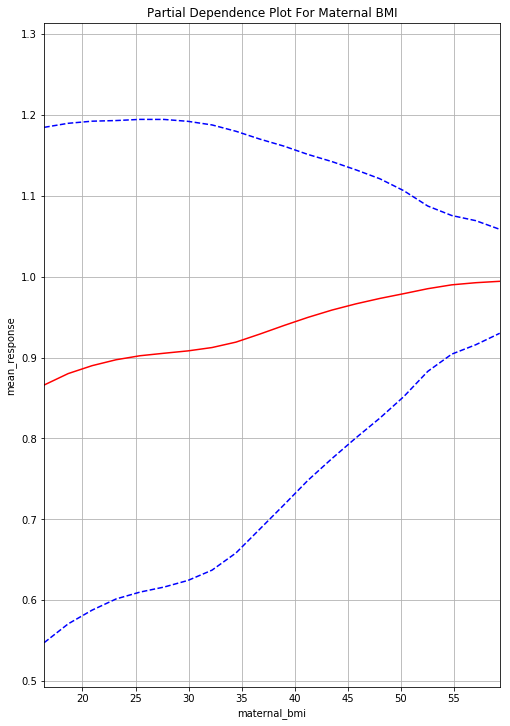

In [54]:
pdp_helpfulness = model_1.partial_plot(frame_training, cols = ["Maternal BMI"])

### Conclusion (Variable importance session):
  
- The top best model is:<font color='red'>__deeplearning__</font>.
  (The 'Stack Ensembled'did not exist in the learderboard.)
  
- AUC of this best model reported on <font color='red'>training</font> is: <font color='red'>AUC = 1.0</font>
- AUC of this best model reported on <font color='red'>cross validation</font> is: <font color='red'>AUC = 0.85249</font>
    
- The top 5 important variables based on best model (deeplearning)are:  
    - <font color='red'>__'Maternal BMI'__</font>  
    - <font color='red'>__'Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).Unknown'__</font>  
    - <font color='red'>__'Have any previous pregnancies had an antepartum haemorrhage? (? 50ml).No'__ </font>  
    - <font color='red'>__'Uterine Malformation.Yes'__</font>  
    - <font color='red'>__'Gestational Age at Collection'__</font>  
  
